In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [106]:
# from google.colab import files
# files.upload()

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 21.6MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 27.2MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.56MB/s]


In [6]:
train_data = pd.read_csv('train.csv')

### Basic Analysis

In [13]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


```
Categorical columns: Survived, Pclass, Sex, SibSp, Parch, Embarked, Cabin
Numerical columns: PassengerId, Age, Fare 
```

Categorical Columns

In [17]:
def barplot(column) :
  print(column)

  plt.figure(figsize = (9, 4))
  plt.xlabel(column)
  plt.ylabel('Count')

  value_counts = train_data[column].value_counts()
  value_counts.plot.bar()
  plt.show()

  print(value_counts)


Survived


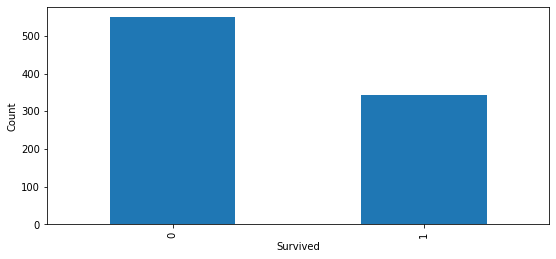

0    549
1    342
Name: Survived, dtype: int64


In [18]:
barplot('Survived')

Pclass


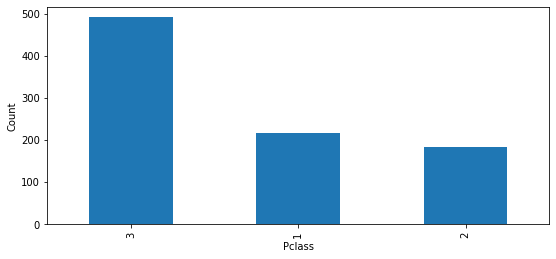

3    491
1    216
2    184
Name: Pclass, dtype: int64


In [19]:
barplot('Pclass')

Sex


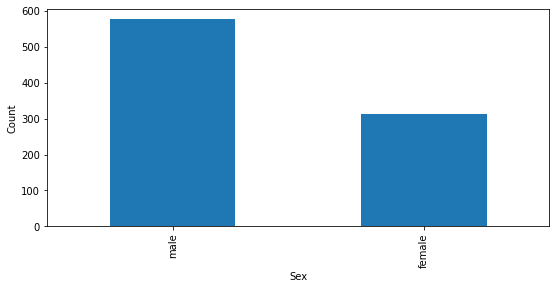

male      577
female    314
Name: Sex, dtype: int64


In [20]:
barplot('Sex')

SibSp


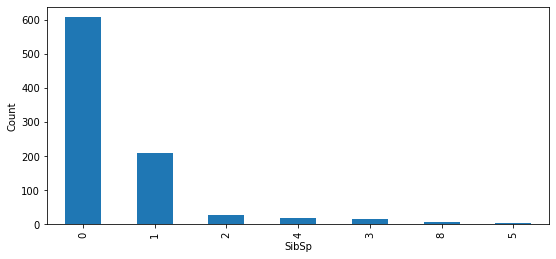

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [21]:
barplot('SibSp')

Parch


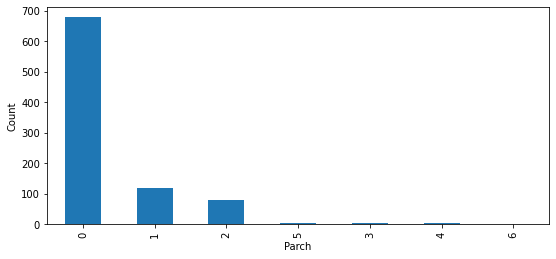

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [22]:
barplot('Parch')

Embarked


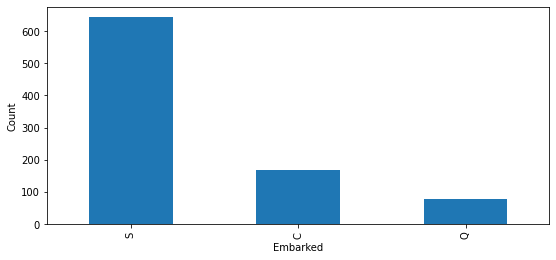

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [23]:
barplot('Embarked')

Numerical Columns

In [24]:
def histplot(column):
  print(column)

  plt.figure(figsize = (9, 4))
  plt.xlabel(column)
  plt.ylabel('Count')

  train_data[column].plot.hist(bins = 50)
  plt.show()

Age


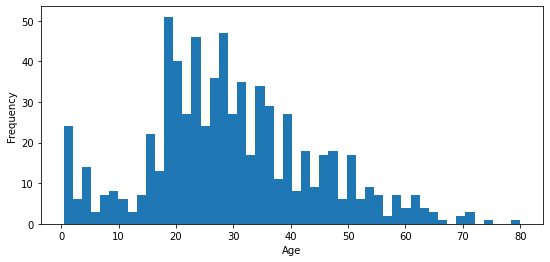

In [25]:
histplot('Age')

Fare


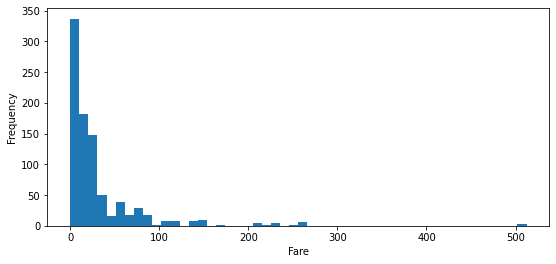

In [26]:
histplot('Fare')

**Survivors by each class**


*   Sex - Survived
*   Pclass - Survived
*   SibSp - Survived
*   Parch - Survived
*   Embarked - Survived
*   Ager - Survived



Sex - Survived


In [27]:
train_data[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by="Survived",ascending = False)

,Survived
Sex,
female,0.742038
male,0.188908


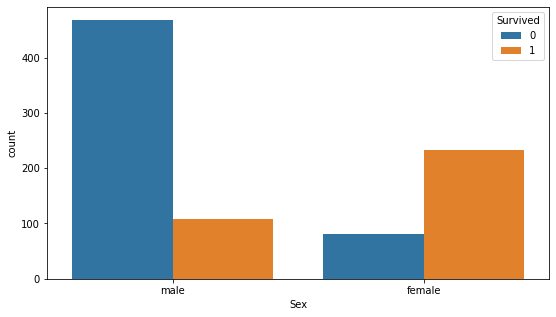

In [28]:
plt.figure(figsize=(9, 5))
sns.countplot(x = "Sex", data=train_data, hue="Survived")
plt.show()

**Observation** <br>
Male passengers have a survival rate of around 19% while female passengers are at 75%. No. of male passengers are almost twice the no. of female passengers, and still the no. of women survived are double that of the no. of men survived.


Pclass - Survived


In [29]:
train_data[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by="Survived",ascending = False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


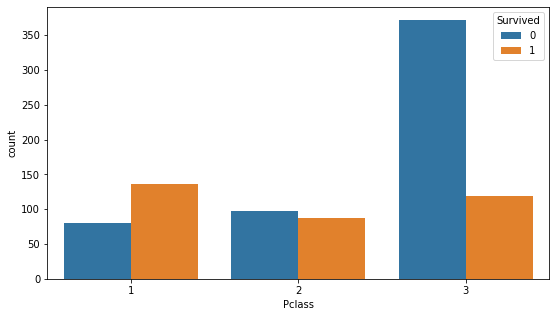

In [30]:
plt.figure(figsize=(9, 5))
sns.countplot(x = "Pclass", data=train_data, hue="Survived")
plt.show()

Pclass vs Sex vs Survived

In [31]:
pd.crosstab([train_data['Sex'], train_data['Survived']], train_data['Pclass'], margins=True).style.background_gradient(cmap='summer_r')

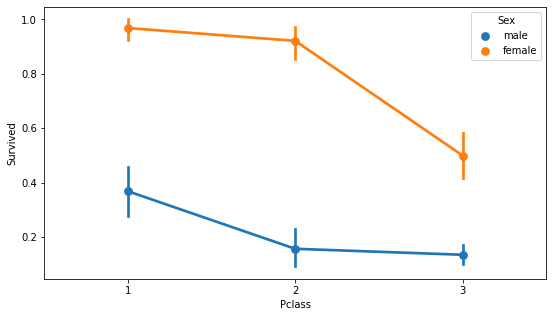

In [32]:
plt.figure(figsize=(9, 5))
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data = train_data)
plt.show()

**Observation** <br>
Women have almost close 1.0 survival rate in Pclass 2 & 3. This drastically drops in Pclass 3.

SibSp - Survived


In [33]:
train_data[['SibSp', 'Survived']].groupby(['SibSp']).mean().sort_values(by="Survived",ascending = False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


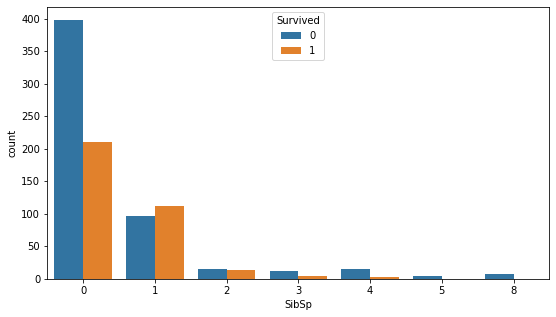

In [34]:
plt.figure(figsize=(9, 5))
sns.countplot(x = "SibSp", data=train_data, hue="Survived")
plt.show()

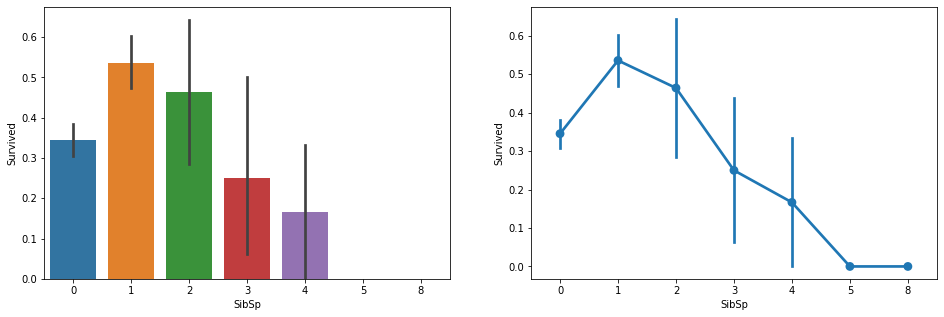

In [35]:
f, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.barplot(x='SibSp', y='Survived', data=train_data, ax=ax[0])

sns.pointplot(x='SibSp', y='Survived', data=train_data, ax=ax[1])

plt.show()

**Observation** <br>
The survival rate decreases with the increase in no. of Siblings and Spouses.

Parch vs Survived


In [36]:
train_data[['Parch', 'Survived']].groupby(['Parch']).mean().sort_values(by="Survived",ascending = False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


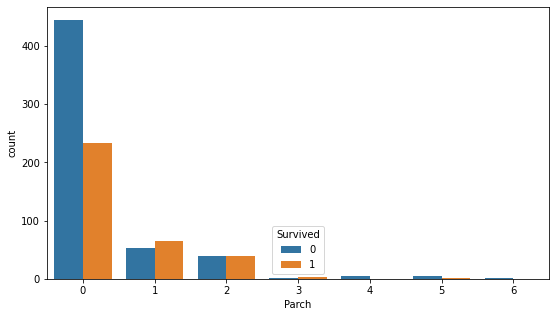

In [37]:
plt.figure(figsize=(9, 5))
sns.countplot(x = "Parch", data=train_data, hue="Survived")
plt.show()

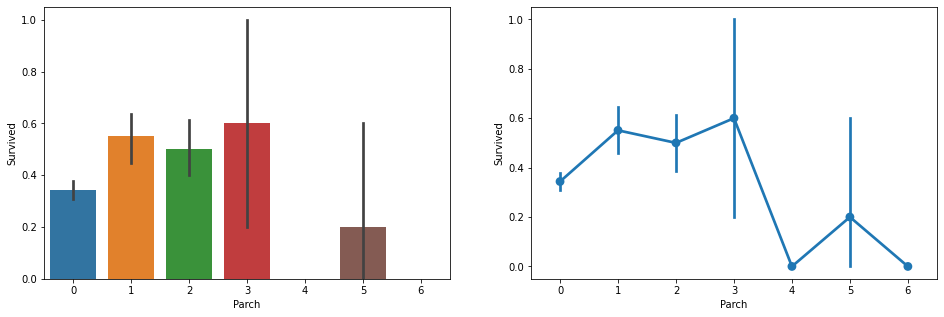

In [38]:
f, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.barplot(x='Parch', y='Survived', data=train_data, ax=ax[0])
sns.pointplot(x='Parch', y='Survived', data=train_data, ax=ax[1])
plt.show()

Embarked vs Survived


In [39]:
train_data[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by="Survived",ascending = False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


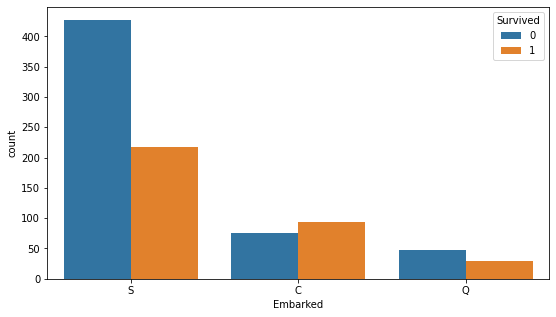

In [40]:
plt.figure(figsize=(9, 5))
sns.countplot(x = "Embarked", data=train_data, hue="Survived")
plt.show()

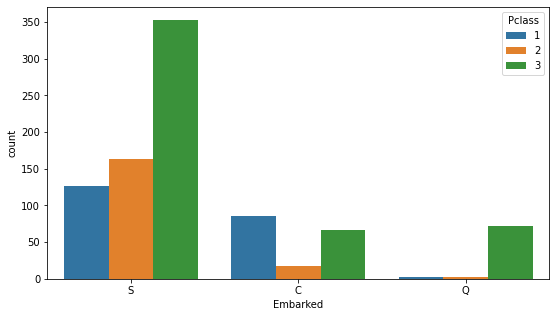

In [41]:
plt.figure(figsize=(9, 5))
sns.countplot(x = "Embarked", data=train_data, hue="Pclass")
plt.show()

**Observation** <br>
The survival rate is higher for those embarked at C, than S and Q. This can be due to the higher ratio of class 1/2 passengers from C. As the survival rate is higher for class 1/2 passenger, as we can see in the graphs above, survival rate is higher for C. 

Age vs Survived

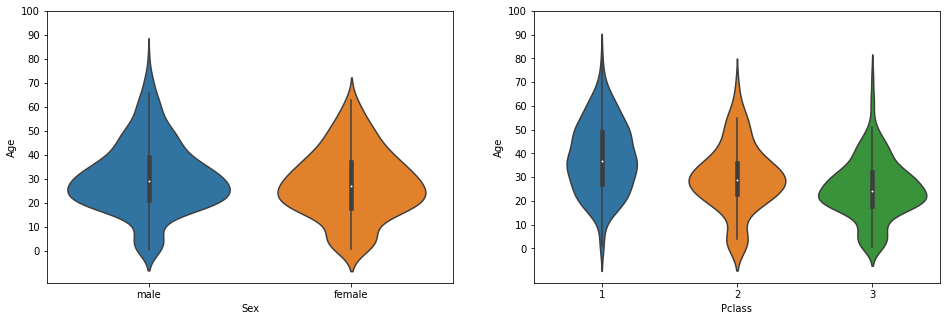

In [42]:
f, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.violinplot(x='Sex', y='Age', data=train_data, ax=ax[0])
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x='Pclass', y='Age', data=train_data, ax=ax[1])
ax[1].set_yticks(range(0,110,10))
plt.show()

### **Missing Values**

In [43]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Embarked

In [44]:

train_data[train_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


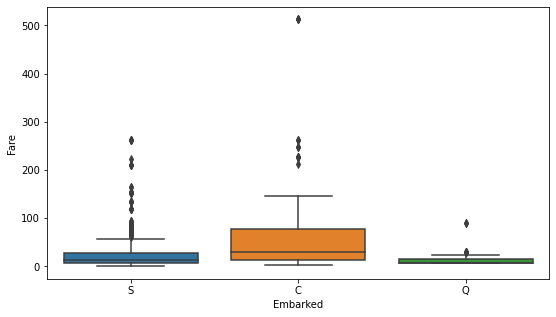

In [45]:
plt.figure(figsize=(9, 5))
sns.boxplot(data=train_data, x='Embarked', y='Fare')
plt.show()

Since the fare of the missing values fall within the Q2 and Q3 fare of those embarked at C, filling the missing values with C.

In [46]:
train_data['Embarked'] = train_data['Embarked'].fillna('C')

In [47]:
train_data[train_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Age

Corelation with sex

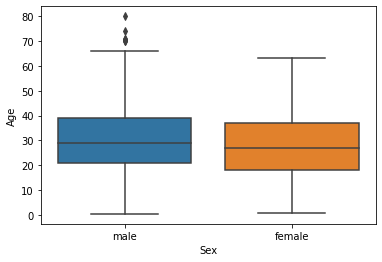

In [48]:
sns.boxplot(data = train_data, x = 'Sex', y = 'Age')
plt.show()

*Age* not corelated to *Sex* <br>
Checking corelation with *Sex* and *Pclass*

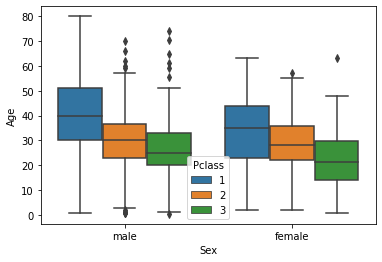

In [49]:
sns.boxplot(data = train_data, x = 'Sex', y = 'Age', hue='Pclass')
plt.show()

Age is related to Pclass. Age of passengers in Class 1 are older that Class 2, and Class 2 are older than Class 3.

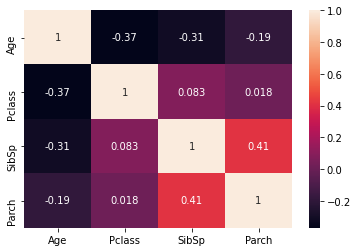

In [50]:
sns.heatmap(train_data[['Age', 'Sex', 'Pclass', 'SibSp', 'Parch']].corr(), annot=True)
plt.show()

As we can see in the heatmap, *Age* is corelated to *Pclass*, *SibSP* and *Parch*. <br>
So we will be filling the empty values with the median of the rows where *Pclass*, *SibSP* and *Parch* are the same.

In [51]:
age_null_ids = list(train_data[train_data['Age'].isnull()].index)
age_med = train_data['Age'].median()

In [52]:
pd.set_option('mode.chained_assignment', None)

for i in age_null_ids:
  age_pred = train_data[(train_data['SibSp'] == train_data.iloc[i]['SibSp']) & (train_data['Parch'] == train_data.iloc[i]['Parch']) & (train_data['Pclass'] == train_data.iloc[i]['Pclass'])]['Age'].median()

  if np.isnan(age_pred):
    train_data['Age'].iloc[i] = age_med
  else:
    train_data['Age'].iloc[i] = age_pred

pd.reset_option('mode.chained_assignment')

In [53]:
train_data[train_data["Age"].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [54]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

**Feature Engineering**

Title from Name

In [55]:
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [56]:
pd.crosstab(train_data['Title'], train_data['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [57]:
other = ['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Mlle', 'Mme', 'Ms', 'Rev', 'Sir']

In [58]:
train_data['Title'] = train_data['Title'].replace(other, 'others')

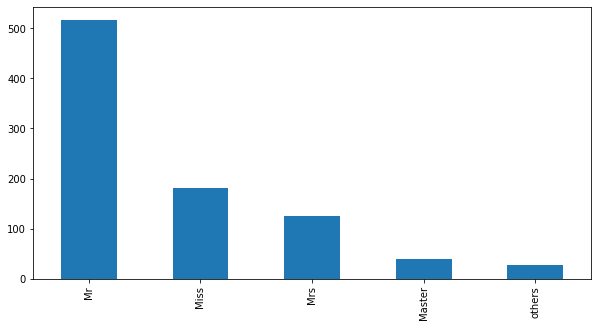

In [59]:
plt.figure(figsize=(10, 5))
train_data['Title'].value_counts().plot.bar()
plt.show()

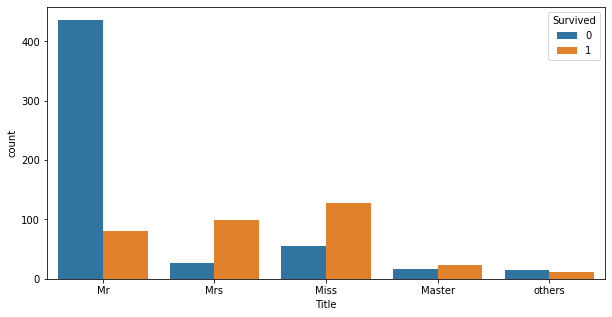

In [60]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Title', data=train_data, hue='Survived')
plt.show()

In [61]:
train_data[['Title', 'Survived']].groupby('Title').mean().sort_values(by='Survived', ascending=False)

,Survived
Title,
Mrs,0.792000
Miss,0.697802
Master,0.575000
others,0.444444
Mr,0.156673


In [62]:
title_mapping = {'Mrs': 1, 'Miss': 2, 'Master': 3, 'Mr': 4, 'others': 5}
train_data['Title'] = train_data['Title'].map(title_mapping)
train_data['Title'] = train_data['Title'].fillna(0)

In [63]:
train_data['Title'].head()

0    4
1    1
2    2
3    1
4    4
Name: Title, dtype: int64

**Observation** <br>
Eventhough the no. of names with 'Mr' is higher than the others combined, the no. of survived is ess than those with 'Mrs' and 'Miss'.

Family Size = Parch + SibSp + 1

In [64]:
train_data['FamilySize'] = train_data['Parch'] + train_data['SibSp']

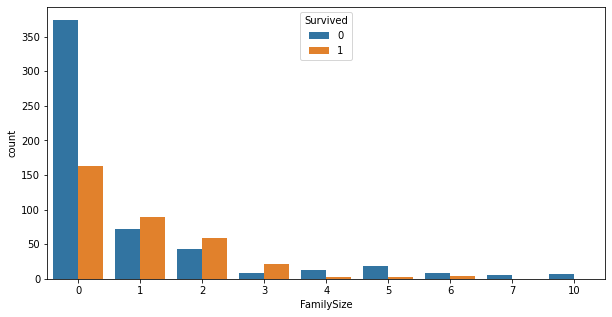

In [65]:
plt.figure(figsize=(10, 5))
sns.countplot(x='FamilySize', data=train_data, hue='Survived')
plt.show()

In [66]:
train_data[['FamilySize', 'Survived']].groupby('FamilySize').mean().sort_values(by='Survived', ascending=False)

,Survived
FamilySize,
3,0.724138
2,0.578431
1,0.552795
6,0.333333
0,0.303538
4,0.200000
5,0.136364
7,0.000000
10,0.000000


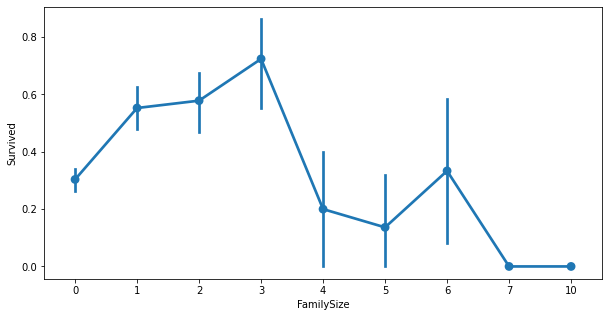

In [67]:
plt.figure(figsize=(10, 5))
sns.pointplot(x='FamilySize', y='Survived', data=train_data)
plt.show()

Age Band <br>
Splitting age into 5 categories : <br>
1-15, 16-30, 31-45, 46-60, 60+

In [68]:
train_data.loc[train_data['Age'] <= 15, 'AgeBand'] = 1
train_data.loc[(train_data['Age'] > 15) & (train_data['Age'] <= 30), 'AgeBand'] = 2
train_data.loc[(train_data['Age'] > 30) & (train_data['Age'] <= 45), 'AgeBand'] = 3
train_data.loc[(train_data['Age'] > 45) & (train_data['Age'] <= 60), 'AgeBand'] = 4
train_data.loc[train_data['Age'] > 60, 'AgeBand'] = 5

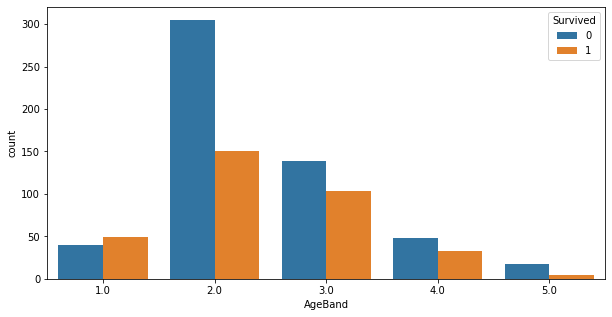

In [69]:
plt.figure(figsize=(10, 5))
sns.countplot(x='AgeBand', data=train_data, hue='Survived')
plt.show()

In [70]:
train_data[['AgeBand', 'Survived']].groupby('AgeBand').mean().sort_values(by='Survived', ascending=False)

,Survived
AgeBand,
1.0,0.550562
3.0,0.427984
4.0,0.407407
2.0,0.331140
5.0,0.227273


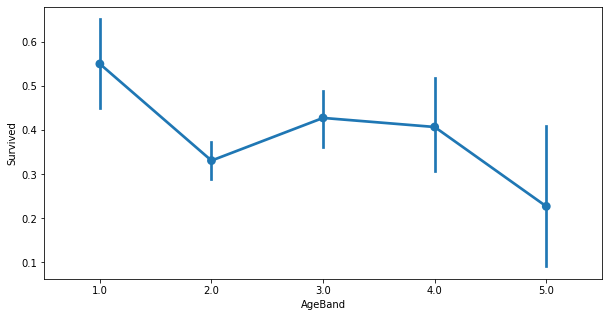

In [71]:
plt.figure(figsize=(10, 5))
sns.pointplot(x='AgeBand', y='Survived', data=train_data)
plt.show()

Alone: if Parch + SibSp = 0

In [72]:
train_data['Alone'] = 0
train_data.loc[train_data['FamilySize'] == 0, 'Alone'] = 1

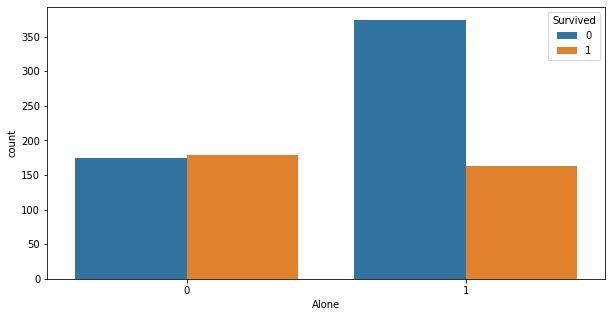

In [73]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Alone', data=train_data, hue='Survived')
plt.show()

In [74]:
train_data[['Alone', 'Survived']].groupby('Alone').mean().sort_values(by='Survived', ascending=False)

,Survived
Alone,
0,0.505650
1,0.303538


**Observation** <br>
As you can see, the chance of survival is less when your alone, rather than when your with a family.

Fare Range <br>
Splitting fare into multiple ranges


In [75]:
train_data['FareRange'] = pd.qcut(train_data['Fare'], 4)

In [76]:
train_data[['FareRange', 'Survived']].groupby('FareRange').mean().sort_values(by='Survived', ascending=False)

,Survived
FareRange,
"(31.0, 512.329]",0.581081
"(14.454, 31.0]",0.454955
"(7.91, 14.454]",0.303571
"(-0.001, 7.91]",0.197309


**Observation** <br>
Higher the fare, higher the survival rate.

In [77]:
train_data['FareCat'] = 0
train_data.loc[train_data.Fare <= 7.91, 'FareCat'] = 0
train_data.loc[(train_data.Fare <= 14.454) & (train_data.Fare > 7.91), 'FareCat'] = 1
train_data.loc[(train_data.Fare <= 31.0) & (train_data.Fare > 14.454), 'FareCat'] = 2
train_data.loc[(train_data.Fare <= 512.329) & (train_data.Fare > 31.0), 'FareCat'] = 3

In [78]:
train_data[['FareCat', 'Survived']].groupby('FareCat').mean().sort_values(by='Survived', ascending=False)

,Survived
FareCat,
3,0.575342
2,0.445415
1,0.308756
0,0.207965


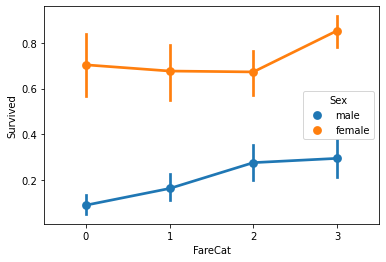

In [79]:
sns.pointplot(x='FareCat', y='Survived', hue='Sex', data=train_data)
plt.show()

Dropping unwanted features

In [80]:
train_data.drop(['Name', 'Age', 'PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'FareRange'], axis=1, inplace=True)

Changing String values to categorical values

In [81]:
train_data['Sex'].replace(['male', 'female'], [0,1], inplace=True)
train_data['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace=True)

In [82]:
train_data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,FamilySize,AgeBand,Alone,FareCat
0,0,3,0,1,0,0,4,1,2.0,0,0
1,1,1,1,1,0,1,1,1,3.0,0,3
2,1,3,1,0,0,0,2,0,2.0,1,1
3,1,1,1,1,0,0,1,1,3.0,0,3
4,0,3,0,0,0,0,4,0,3.0,1,1


Combining all the preprocessing steps into one method

In [83]:
def preprocess_name(data):
  data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
  other = ['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Mlle', 'Mme', 'Ms', 'Rev', 'Sir']
  data['Title'] = data['Title'].replace(other, 'others')
  title_mapping = {'Mrs': 1, 'Miss': 2, 'Master': 3, 'Mr': 4, 'others': 5}
  data['Title'] = data['Title'].map(title_mapping)
  data['Title'] = data['Title'].fillna(0)

  return data

def add_family_size(data):
  data['FamilySize'] = data['Parch'] + data['SibSp']

  return data

def add_alone(data):
  data['Alone'] = 0
  data.loc[data['FamilySize'] == 0, 'Alone'] = 1

  return data

def add_age_band(data):
  data.loc[data['Age'] <= 15, 'AgeBand'] = 1
  data.loc[(data['Age'] > 15) & (data['Age'] <= 30), 'AgeBand'] = 2
  data.loc[(data['Age'] > 30) & (data['Age'] <= 45), 'AgeBand'] = 3
  data.loc[(data['Age'] > 45) & (data['Age'] <= 60), 'AgeBand'] = 4
  data.loc[data['Age'] > 60, 'AgeBand'] = 5

  return data

def add_fare_cat(data):
  data['FareRange'] = pd.qcut(data['Fare'], 4)

  data['FareCat'] = 0
  data.loc[data.Fare <= 7.91, 'FareCat'] = 0
  data.loc[(data.Fare <= 14.454) & (data.Fare > 7.91), 'FareCat'] = 1
  data.loc[(data.Fare <= 31.0) & (data.Fare > 14.454), 'FareCat'] = 2
  data.loc[(data.Fare <= 512.329) & (data.Fare > 31.0), 'FareCat'] = 3

  return data

def drop_unwanted(data):
  data.drop(['Name', 'Age', 'PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'FareRange'], axis=1, inplace=True)

  return data

def fill_na_age(data):
  age_null_ids = list(data[data['Age'].isnull()].index)
  age_med = data['Age'].median()

  pd.set_option('mode.chained_assignment', None)

  for i in age_null_ids:
    age_pred = data[(data['SibSp'] == data.iloc[i]['SibSp']) & (data['Parch'] == data.iloc[i]['Parch']) & (data['Pclass'] == data.iloc[i]['Pclass'])]['Age'].median()

    if np.isnan(age_pred):
      data['Age'].iloc[i] = age_med
    else:
      data['Age'].iloc[i] = age_pred

  pd.reset_option('mode.chained_assignment')

  return data

def fill_na_fare(data):
  data['Fare'].fillna(data['Fare'].dropna().median(), inplace=True)

  return data

def to_categorical(data):
  data['Sex'].replace(['male', 'female'], [0,1], inplace=True)
  data['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace=True)

  return data

def preprocess(data):
  data = fill_na_age(data)
  data = fill_na_fare(data)
  data = preprocess_name(data)
  data = add_family_size(data)
  data = add_alone(data)
  data = add_age_band(data)
  data = add_fare_cat(data)
  data = drop_unwanted(data)
  data = to_categorical(data)

  return data

### **Model**

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [92]:
train,test=train_test_split(train_data,test_size=0.3,random_state=0,stratify=train_data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=train_data[train_data.columns[1:]]
Y=train_data['Survived']

# Validation set
_,val=train_test_split(train_data,test_size=0.3,random_state=0,stratify=train_data['Survived'])

val_X = val[val.columns[1:]]
val_y = val[val.columns[:1]]

1. Logistic Regression


In [267]:
logistic_regression = LogisticRegression()
logistic_regression.fit(train_X, train_Y.values.ravel())

test_Y_pred = logistic_regression.predict(test_X)

acc_logreg = metrics.accuracy_score(test_Y_pred, test_Y)

print("Accuracy: ", acc_logreg)

Accuracy:  0.8208955223880597


2.  Random Forest

In [342]:
acc_rf = []

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_X, train_Y.values.ravel())
test_Y_pred = random_forest.predict(test_X)
acc_rf.append(metrics.accuracy_score(test_Y_pred, test_Y))

print("Accuracy: ", acc_rf)

Accuracy:  [0.8395522388059702]


3.  K Nearest Neighbors Classifier



In [269]:
knn = KNeighborsClassifier()
knn.fit(train_X, train_Y.values.ravel())

test_Y_pred = knn.predict(test_X)

acc_knn = metrics.accuracy_score(test_Y_pred, test_Y)

print("Accuracy: ", acc_knn)

Accuracy:  0.7798507462686567


4.  Decision Tree Classifier

In [274]:
dt = DecisionTreeClassifier()
dt.fit(train_X, train_Y.values.ravel())

test_Y_pred = dt.predict(test_X)

acc_dt = metrics.accuracy_score(test_Y_pred, test_Y)

print("Accuracy: ", acc_dt)

Accuracy:  0.8097014925373134


5.  Naive Baiyes

In [275]:
nb = GaussianNB()
nb.fit(train_X, train_Y.values.ravel())

test_Y_pred = nb.predict(test_X)

acc_nb = metrics.accuracy_score(test_Y_pred, test_Y)

print("Accuracy: ", acc_nb)

Accuracy:  0.8022388059701493


In [84]:
def submission_csv(test_X, pred, file_name):
  sub = pd.DataFrame()
  sub['PassengerId'] = test_X['PassengerId']
  sub['Survived'] = pred

  sub.to_csv(file_name, index=False)

def predict_and_save_nn(model, test_X, file_name):
  test_x_preprocessed = preprocess(test_X.copy())
  P = model.predict(test_x_preprocessed)
  P = (P > 0.5).astype(int).reshape(test_X.shape[0])
  submission_csv(test_X, P, file_name)

In [87]:
test = pd.read_csv('test.csv')
test = preprocess(test)

Neural Network

In [85]:
from tensorflow import keras

In [88]:
test.head()

,Pclass,Sex,SibSp,Parch,Embarked,Title,FamilySize,Alone,AgeBand,FareCat
0,3,0,0,0,2,4.0,0,1,3.0,0
1,3,1,1,0,0,1.0,1,0,4.0,0
2,2,0,0,0,2,4.0,0,1,5.0,1
3,3,0,0,0,0,4.0,0,1,2.0,1
4,3,1,1,1,0,1.0,2,0,2.0,1


In [102]:
nn = keras.Sequential()
nn.add(keras.layers.Dense(10, kernel_initializer = 'uniform', activation='relu'))
nn.add(keras.layers.Dense(20, kernel_initializer = 'uniform', activation='relu'))
nn.add(keras.layers.Dense(20, kernel_initializer = 'uniform', activation='relu'))
nn.add(keras.layers.Dense(20, kernel_initializer = 'uniform', activation='relu'))
nn.add(keras.layers.Dense(20, kernel_initializer = 'uniform', activation='relu'))
nn.add(keras.layers.Dense(20, kernel_initializer = 'uniform', activation='relu'))
nn.add(keras.layers.Dense(20, kernel_initializer = 'uniform', activation='relu'))
nn.add(keras.layers.Dense(1, kernel_initializer = 'uniform', activation='sigmoid'))

nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
nn.fit(train_X, train_Y, validation_data=(val_X, val_y), batch_size=64, epochs=100)

In [104]:
test = pd.read_csv('test.csv')
predict_and_save_nn(nn, test, 'nn_4.csv')

In [105]:
! kaggle competitions submit -c titanic -f nn_4.csv -m "nn model 4"

100% 2.77k/2.77k [00:02<00:00, 954B/s]
Successfully submitted to Titanic - Machine Learning from Disaster